In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
tf.compat.v1.reset_default_graph()

df = pd.read_csv('house_data-no.csv')

y = df['建物單價元/坪']
X = df.drop(['建物單價元/坪'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)

(100594, 74)
(100594,)


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.reset_default_graph()

model = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
#     layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer=Adam(0.0001), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 46,113
Trainable params: 46,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=30,
              epochs=100)

Epoch 1/100
3354/3354 [==============================] - 7s 2ms/step - loss: 0.4305 - val_loss: 0.1075
Epoch 2/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.1069 - val_loss: 0.0993
Epoch 3/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.1035 - val_loss: 0.0962
Epoch 4/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.1002 - val_loss: 0.0975
Epoch 5/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0969 - val_loss: 0.0964
Epoch 6/100
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0955 - val_loss: 0.0936
Epoch 7/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0959 - val_loss: 0.0981
Epoch 8/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0959 - val_loss: 0.0936
Epoch 9/100
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0933 - val_loss: 0.0937
Epoch 10/100
3354/3354 [==============================] - 7s 2ms/step - l

Epoch 80/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0809 - val_loss: 0.0946
Epoch 81/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0828 - val_loss: 0.0955
Epoch 82/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0804 - val_loss: 0.0937
Epoch 83/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0809 - val_loss: 0.0951
Epoch 84/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0812 - val_loss: 0.0939
Epoch 85/100
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0805 - val_loss: 0.0973
Epoch 86/100
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0801 - val_loss: 0.0949
Epoch 87/100
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0808 - val_loss: 0.0979
Epoch 88/100
3354/3354 [==============================] - 5s 1ms/step - loss: 0.0810 - val_loss: 0.0951
Epoch 89/100
3354/3354 [==============================] - 5s 2ms

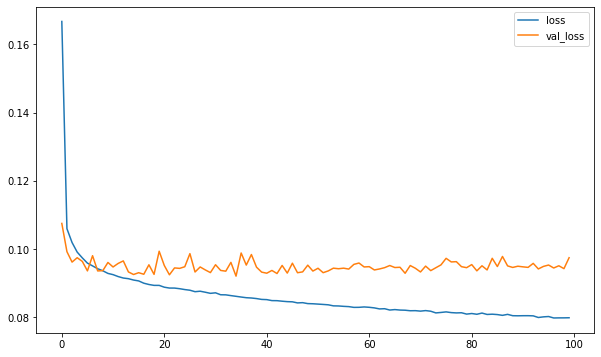

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [12]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [13]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('='*100)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.20430403740138714
MSE: 0.09749677193165769
RMSE: 0.3122447308308944
R2 Square 0.4419886713377934
Train set evaluation:
_____________________________________
MAE: 0.18743978844568376
MSE: 0.07886755558659685
RMSE: 0.2808336795802755
R2 Square 0.551252146037103


In [16]:
result = model.evaluate(X_test, y_test)
print(result)

1348/1348 [==============================] - 2s 2ms/step - loss: 0.0975
0.09749679267406464


In [17]:
model.save('price_model.h5')

In [18]:
# new_model = keras.models.load_model('dnn_mnist_model.h5')
# new_model.summary()